# Automatic Speech Recognition Hand-on & Advanced Kaldi Toolkit Courses
by Yuan-Fu Liao, National Taipei University of Technology
* yfliao@ntut.edu.tw
---

# Introduction to Spoken Dialogue System: Toy Examples
* How to buils Your own Javis/Voice Assistant using Google Speech Recognition and Synthesis APIs
* Essentail Compoments of Spoken Dialog System

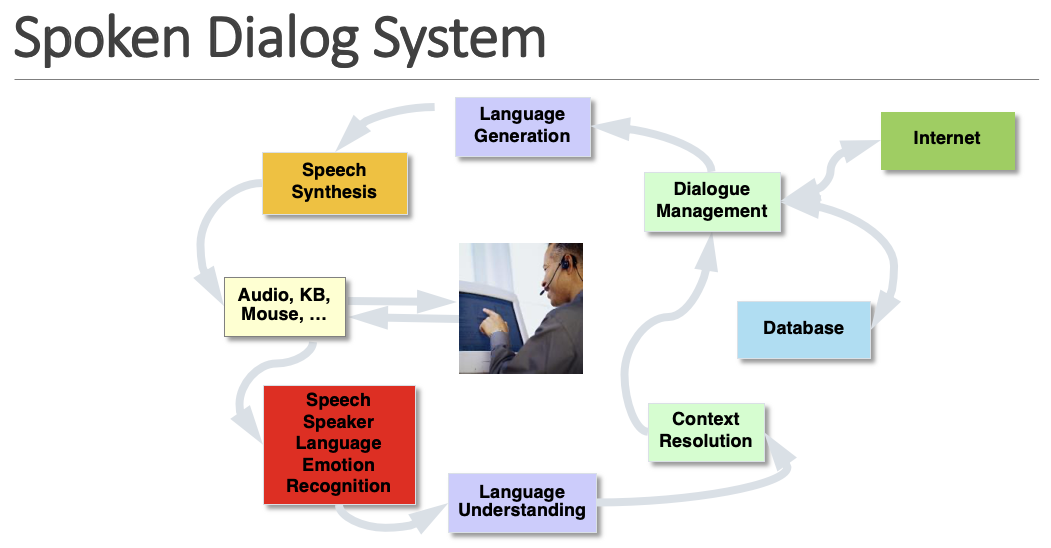

* Google Speech-to-Text
* Google Text-to-Speech

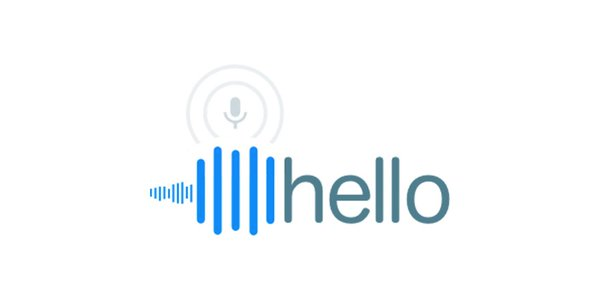

# Virtual Machine

## Hardware and Software

In [5]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.3 LTS
Release:	18.04
Codename:	bionic


In [6]:
import sys ; print(sys.version_info)

sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


In [7]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2200.000
BogoMIPS:            4400.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin

In [8]:
!cat /proc/cpuinfo | grep 'core id'

core id		: 0
core id		: 0


In [9]:
!nvidia-smi

Sat Nov 16 14:45:49 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [10]:
!df

Filesystem     1K-blocks     Used Available Use% Mounted on
overlay        375674948 31446788 325075264   9% /
tmpfs              65536        0     65536   0% /dev
tmpfs            6667596        0   6667596   0% /sys/fs/cgroup
/dev/sda1      382718764 41104828 341597552  11% /opt/bin
tmpfs            6667596       12   6667584   1% /var/colab
shm              6160384        4   6160380   1% /dev/shm
tmpfs            6667596        0   6667596   0% /proc/acpi
tmpfs            6667596        0   6667596   0% /proc/scsi
tmpfs            6667596        0   6667596   0% /sys/firmware


## Requirements

In [0]:
!sudo apt install libasound-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!sudo apt install python-pyaudio

In [0]:
!pip install SpeechRecognition
!pip install pydub
!pip install wolframalpha selenium
!pip install gTTS
!pip install pyaudio
!pip install ffmpeg-python
!pip install librosa

# Microphone

In [0]:
AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);

function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

# SimpleChatBot

## Import Packages

In [0]:
# importing speech recognition package from google api 
import speech_recognition as sr
from gtts import gTTS # google text to speech 
import os # to save/open files 
import sys
import io
import wolframalpha # to calculate strings into formula 
from selenium import webdriver # to control browser operations
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import ffmpeg
import wave
import pydub
from pydub import AudioSegment
from scipy.io.wavfile import read as wav_read
import matplotlib.pyplot as plt
import librosa
import librosa.display

## Global Variables

In [0]:
language = 'en'

In [0]:
rnum = 1
hnum = 1
name ='Human'

## Function Calls

In [0]:
def read_mp3(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

In [0]:
def write_mp3(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")

In [0]:
def write_wav(f, sr, x, normalized=False):
    # 開檔
    f = wave.open(f, "wb")

    # 配置聲道数、量化位数和取樣频率
    f.setnchannels(1)
    f.setsampwidth(2)
    f.setframerate(sr)

    # 轉換為二進制，再寫入檔案
    wave_data = x.astype(np.short)
    f.writeframes(wave_data.tostring())
    f.close()

In [0]:
def robot_speaks(output): 
    global language
    global rnum
    # num to rename every audio file  
    # with different name to remove ambiguity 
    rnum += 1
    print("PerSon : ", output) 
  
    toSpeak = gTTS(text = output, lang = language, slow = False) 
    
    # saving the audio file given by google text to speech 
    robot_sound_file = "robot-"+str(rnum)+".mp3"
    toSpeak.save(robot_sound_file)
    
    return robot_sound_file

In [0]:
def get_audio():
		global hnum

		# call microphone
		display(HTML(AUDIO_HTML))
		data = eval_js("data")
		binary = b64decode(data.split(',')[1])
  
		process = (ffmpeg
	  		.input('pipe:0')
	  		.output('pipe:1', format='wav')
	  		.run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
		)
		output, err = process.communicate(input=binary)
  
		riff_chunk_size = len(output) - 8
		# Break up the chunk size into four bytes, held in b.
		q = riff_chunk_size
		b = []
		for i in range(4):
				q, r = divmod(q, 256)
				b.append(r)

		# Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
		riff = output[:4] + bytes(b) + output[8:]
		sr, audio = wav_read(io.BytesIO(riff))

		# save
		hnum += 1
		human_sound_file = "human-"+str(hnum)+".wav"
		print(human_sound_file)
		write_wav(human_sound_file, sr, audio)

		return human_sound_file

In [0]:
def get_text(human_sound_file):

    global language

    # initialize the recognizer
    asr = sr.Recognizer()

    # open the file
    try:
        with sr.AudioFile(human_sound_file) as source:
            # listen for the data (load audio to memory)
            audio_data = asr.record(source)
            # recognize (convert from speech to text)
            text = asr.recognize_google(audio_data, language = language, show_all = False)
            return text
    except:
        text = "Sorry, I can't understand. Please say again!"
        print(text)
        return text 

In [0]:
def process_text(input): 

	  input = input.lower()
	  print("process " + input)

	  if 'search' in input or 'play' in input: 
		    print('search or play')
		    # a basic web crawler using selenium
#		    robot_sound_file = robot_speaks("Search web")
		    robot_sound_file = search_web(input)
		    return robot_sound_file
	  elif "who are you" in input or "define yourself" in input: 
		    print('who are you')
		    speak = '''Hello, I am Person. Your personal assistant. 
		    I am here to make your life easier. You can command me to perform 
		    various tasks such as calculating sums or opening applications etcetra'''
		    robot_sound_file = robot_speaks(speak)
		    return robot_sound_file
	  elif "who made you" in input or "created you" in input: 
		    print('who mad you')
		    speak = "I have been created by Sheetansh Kumar."
		    robot_sound_file = robot_speaks(speak) 
		    return robot_sound_file
	  elif "AI Fun Cup" in input:# just 
		    print('AiFunCup')
		    speak = """Welcome to AiFunCup, everybody."""
		    robot_sound_file = robot_speaks(speak) 
		    return robot_sound_file
	  elif "calculate" in input: 
		    print('calculate')  
		    # write your wolframalpha app_id here 
		    app_id = "WOLFRAMALPHA_APP_ID" 
		    client = wolframalpha.Client(app_id)  
		    indx = input.lower().split().index('calculate') 
		    query = input.split()[indx + 1:] 
		    res = client.query(' '.join(query)) 
		    answer = next(res.results).text 
		    robot_sound_file = robot_speaks("The answer is " + answer) 
		    return robot_sound_file
	  elif 'open' in input:               
		    print('open')
		    # another function to open  
		    # different application availaible 
		    open_application(input.lower()) 
		    robot_sound_file = robot_speaks("Open Application")
		    return robot_sound_file
	  else: 
		    robot_sound_file = robot_speaks("I can search the web for you, Do you want to try?") 
		    return robot_sound_file


In [0]:
# function used to open web site
# you need to run locally and install "chromedriver" first from https://sites.google.com/a/chromium.org/chromedriver/
def search_web(input):

		input = input.lower()
		print("search " + input)

#		driver = webdriver.Chrome()
#		driver.implicitly_wait(1)
#		driver.maximize_window()

		if 'youtube' in input.lower():
				robot_sound_file = robot_speaks("Opening in youtube") 
				indx = input.lower().split().index('youtube') 
				query = input.split()[indx + 1:] 
#				driver.get("http://www.youtube.com/results?search_query =" + '+'.join(query)) 
				return robot_sound_file
		elif 'wikipedia' in input.lower(): 
				robot_sound_file = robot_speaks("Opening Wikipedia") 
				indx = input.lower().split().index('wikipedia') 
				query = input.split()[indx + 1:] 
#				driver.get("https://en.wikipedia.org/wiki/" + '_'.join(query)) 
				return robot_sound_file
		else: 
				if 'google' in input: 
						indx = input.lower().split().index('google') 
						query = input.split()[indx + 1:] 
#						driver.get("https://www.google.com/search?q =" + '+'.join(query)) 
				elif 'search' in input: 
						indx = input.lower().split().index('search') 
						query = input.split()[indx + 1:] 
#						driver.get("https://www.google.com/search?q =" + '+'.join(query)) 
				else:
						print('search what?')
#						driver.get("https://www.google.com/search?q =" + '+'.join(input.split())) 
				return

In [0]:
# function used to open application present inside the system. 
def open_application(input):

	input = input.lower()
# 	print("open " + input)

	if "chrome" in input: 
			robot_sound_file = robot_speaks("Google Chrome")
#			os.startfile('C:\Program Files (x86)\Google\Chrome\Application\chrome.exe')
			return robot_sound_file
	elif "firefox" in input or "mozilla" in input: 
			robot_sound_file = robot_speaks("Opening Mozilla Firefox") 
#			os.startfile('C:\Program Files\Mozilla Firefox\\firefox.exe') 
			return robot_sound_file
	elif "word" in input: 
			robot_sound_file = robot_speaks("Opening Microsoft Word") 
#			os.startfile('C:\ProgramData\Microsoft\Windows\Start Menu\Programs\Microsoft Office 2013\\Word 2013.lnk') 
			return robot_sound_file
	elif "excel" in input: 
			robot_sound_file = robot_speaks("Opening Microsoft Excel") 
 #  		os.startfile('C:\ProgramData\Microsoft\Windows\Start Menu\Programs\Microsoft Office 2013\\Excel 2013.lnk') 
			return robot_sound_file
	else: 
			robot_sound_file = robot_speaks("Application not available") 
			return robot_sound_file


## Simple Conversation

In [0]:
# Robot Gretting
robot_sound_file = robot_speaks("What's your name, Human?")
print(robot_sound_file)
Audio(robot_sound_file, autoplay=True)

In [0]:
# Human Speak
human_sound_file = get_audio() 

In [0]:
# Speech Recognition
text = get_text(human_sound_file)
print(text)

In [0]:
# Robot Speak
name = text
robot_sound_file = robot_speaks("Hello, " + name + '.' + " " + "What could I do for your?") 
print(robot_sound_file)
Audio(robot_sound_file, autoplay=True)

In [0]:
# Human Speak
human_sound_file = get_audio() 

In [0]:
# Speech Recognition
text = get_text(human_sound_file)
print(text)

In [0]:
# Robot Speak
robot_sound_file = process_text(text)
print(robot_sound_file)
Audio(robot_sound_file, autoplay=True)

# Question Answering - A Toy Example

In [0]:
language = 'zh-TW'
qa = {
    'iphone' : 'it is too expansive',
    'snoy' : 'it is too ugly',
    'samsung' : 'it is too dangerous',
    '大杯奶茶' : '請找伯恩Stand Up!'
}

In [0]:
# Human Speak
human_sound_file = get_audio() 

In [0]:
# Speech Recognition
text = get_text(human_sound_file)
print(text)

In [0]:
# output = qa.get(text.lower(),'Please say again...')
output = qa.get(text.lower(),'你說什麼...')
robot_sound_file= robot_speaks(output)
print(robot_sound_file)
Audio(robot_sound_file, autoplay=True)